# Hackathon: From Raw Data to ML-Ready Dataset
## Insight-Driven EDA and End-to-End Feature Engineering on Airbnb Data Using pandas and Plotly

### What is a Hackathon?

A hackathon is a fast-paced, collaborative event where participants use data and technology to solve a real problem end-to-end.  
In this hackathon, you will work with a **real-world Airbnb dataset** and complete two interconnected goals:

- Produce a **high-quality exploratory data analysis (EDA)** using `pandas` and `plotly`, extracting meaningful insights, trends, and signals from the data.  
- Design and deliver a **clean, feature-rich, ML-ready dataset** that will serve as the foundation for a follow-up hackathon focused on building and evaluating machine learning models.

Your task is to **get the most out of the data**: uncover structure and patterns through EDA, and engineer informative features (numerical, categorical, temporal, textual (TF–IDF), and optionally image-based) to maximize the predictive power of the final dataset.

<div class="alert alert-success">
<b>About the Dataset</b>

<u>Context</u>

The data comes from <a href="https://insideairbnb.com/get-the-data/">Inside Airbnb</a>, an open project that publishes detailed, regularly updated datasets for cities around the world.  
Each city provides three main CSV files:

- <b>listings.csv</b> — property characteristics, host profiles, descriptions, amenities, etc.  
- <b>calendar.csv</b> — daily availability and pricing information for each listing.  
- <b>reviews.csv</b> — guest feedback and textual reviews.

These datasets offer a rich view of the short-term rental market, including availability patterns, pricing behavior, host attributes, and guest sentiment.  

<u>Inspiration</u>

Your ultimate objective is to create a dataset suitable for training a machine learning model that predicts whether a specific Airbnb listing will be <b>available on a given date</b>, using property attributes, review information, and host characteristics.
</div>

<div class="alert alert-info">
<b>Task</b>

Using one city of your choice from Inside Airbnb, create an end-to-end pipeline that:

1. Loads and explores the raw data (EDA).  
2. Engineers features (numerical, categorical, temporal, textual TF–IDF, etc.).  
3. Builds a unified ML-ready dataset.  

Please remember to add comments explaining your decisions. Comments help us understand your thought process and ensure accurate evaluation of your work. This assignment requires code-based solutions—**manually calculated or hard-coded results will not be accepted**. Thoughtful comments and visualizations are encouraged and will be highly valued.

- Write your solution directly in this notebook, modifying it as needed.
- Once completed, submit the notebook in **.ipynb** format via Moodle.
    
<b>Collaboration Requirement: Git & GitHub</b>

You must collaborate with your team using a **shared GitHub repository**.  
Your use of Git is part of the evaluation. We will specifically look at:

- Commit quality (clear messages, meaningful steps).  
- Balanced participation across team members.  
- Use of branches.  
- Ability to resolve merge conflicts appropriately.  
- A clean, readable project history that reflects real collaboration.

Good Git practice is **part of your grade**, not optional.
</div>
<div class="alert alert-danger">
    You are free to add as many cells as you wish as long as you leave untouched the first one.
</div>

<div class="alert alert-warning">

<b>Hints</b>

- Text columns often carry substantial predictive power, use text-vectorization methods to extract meaningful features.  
- Make sure all columns use appropriate data types (categorical, numeric, datetime, boolean). Correct dtypes help prevent subtle bugs and improve performance.  
- Feel free to enrich the dataset with any additional information you consider useful: engineered features, external data, derived temporal features, etc.  
- If the dataset is too large for your computer, use <code>.sample()</code> to work with a subset while preserving the logic of your pipeline.  
- Plotly offers a wide variety of powerful visualizations, experiment creatively, but always begin with a clear analytical question: *What insight am I trying to uncover with this plot?*

</div>




<div class="alert alert-danger">
<b>Submission Deadline:</b> Wednesday, December 3rd, 12:00

Start with a simple, working pipeline.  
Do not over-complicate your code too much. Start with a simple working solution and refine it if you have time.
</div>

<div class="alert alert-danger">
    
You may add as many cells as you want, but the **first cell must remain exactly as provided**. Do not edit, move, or delete it under any circumstances.
</div>


In [2]:
# LEAVE BLANK

### Team Information

Fill in the information below.  
All fields are **mandatory**.

- **GitHub Repository URL**: Paste the link to the team repo you will use for collaboration.
- **Team Members**: List all student names (and emails or IDs if required).

Do not modify the section title.  
Do not remove this cell.


In [3]:
# === Team Information (Mandatory) ===
# Fill in the fields below.

GITHUB_REPO = "https://github.com/dacobri/Python-Hackathon---Group-A10.git"       
TEAM_MEMBERS = [
     "Aumkar Prasad Wagle ",
    "Brice Da Costa",
    "Giorgio Fiorentino",
    "Jakob Kohrgruber",
    "Georgii Runko"
]

GITHUB_REPO, TEAM_MEMBERS


('https://github.com/dacobri/Python-Hackathon---Group-A10.git',
 ['Aumkar Prasad Wagle ',
  'Brice Da Costa',
  'Giorgio Fiorentino',
  'Jakob Kohrgruber',
  'Georgii Runko'])

In [4]:
import pandas as pd
# URLs
df_calendar = pd.read_csv("/Users/dacobri/Desktop/MSc Business Analytics/Classes Term 1/Python for Data Science/Hackathon/Data/calendar.csv")
df_listings = pd.read_csv("/Users/dacobri/Desktop/MSc Business Analytics/Classes Term 1/Python for Data Science/Hackathon/Data/listings.csv")
df_reviews = pd.read_csv("/Users/dacobri/Desktop/MSc Business Analytics/Classes Term 1/Python for Data Science/Hackathon/Data/reviews.csv")



# Quick check
print(df_listings.head())
print(df_calendar.head())
print(df_reviews.head())


      id                         listing_url       scrape_id last_scraped  \
0  18674  https://www.airbnb.com/rooms/18674  20250914152803   2025-09-15   
1  23197  https://www.airbnb.com/rooms/23197  20250914152803   2025-09-14   
2  32711  https://www.airbnb.com/rooms/32711  20250914152803   2025-09-15   
3  34241  https://www.airbnb.com/rooms/34241  20250914152803   2025-09-15   
4  34981  https://www.airbnb.com/rooms/34981  20250914152803   2025-09-15   

        source                                               name  \
0  city scrape    Huge flat for 8 people close to Sagrada Familia   
1  city scrape  Forum CCIB DeLuxe, Spacious, Large Balcony, relax   
2  city scrape                   Sagrada Familia area - Còrsega 1   
3  city scrape   Stylish Top Floor Apartment - Ramblas Plaza Real   
4  city scrape               VIDRE HOME PLAZA REAL on LAS RAMBLAS   

                                         description  \
0  110m2 apartment to rent in Barcelona. Located ...   
1  Beautif

In [5]:
import numpy as np
import pandas as pd

# 1 Sample listings for a manageable subset
n_listings = 1000
listings_sample = df_listings.sample(n=n_listings, random_state=42).copy()
sample_ids = listings_sample["id"].unique()

# 2 Filter calendar and reviews to the sampled listings
calendar_sample = df_calendar[df_calendar["listing_id"].isin(sample_ids)].copy()
reviews_sample = df_reviews[df_reviews["listing_id"].isin(sample_ids)].copy()

# 3 Aggregate reviews to listing level
reviews_sample["review_date"] = pd.to_datetime(reviews_sample["date"], errors="coerce")
reviews_sample["comment_length"] = reviews_sample["comments"].str.len()

reviews_agg = (
    reviews_sample
    .groupby("listing_id")
    .agg(
        review_count=("id", "size"),
        last_review_date=("review_date", "max"),
        mean_comment_length=("comment_length", "mean")
    )
    .reset_index()
)

# 4 Use calendar as base and merge listing attributes
calendar_sample["calendar_date"] = pd.to_datetime(calendar_sample["date"], errors="coerce")

calendar_listings = calendar_sample.merge(
    listings_sample,
    left_on="listing_id",
    right_on="id",
    how="left",
    suffixes=("_calendar", "_listing")
)

# 5 Merge aggregated reviews into the calendar plus listings table
merged_full = calendar_listings.merge(
    reviews_agg,
    on="listing_id",
    how="left"
)

# 6 Optional row level sample for lighter EDA or modelling
final_sample = merged_full.sample(n=1000, random_state=42).reset_index(drop=True)

# 7 Quick checks
print("Shapes:")
print("  listings_sample:", listings_sample.shape)
print("  calendar_sample:", calendar_sample.shape)
print("  reviews_sample:", reviews_sample.shape)
print("  merged_full:", merged_full.shape)
print("  final_sample:", final_sample.shape)

print("\nNon null share in key columns:")
print(final_sample[["listing_id", "calendar_date", "available", "name"]].notna().mean())

print("\nExample rows:")
print(final_sample[["listing_id", "calendar_date", "available", "name", "review_count"]].head())


Shapes:
  listings_sample: (1000, 79)
  calendar_sample: (365000, 8)
  reviews_sample: (51107, 8)
  merged_full: (365000, 90)
  final_sample: (1000, 90)

Non null share in key columns:
listing_id       1.0
calendar_date    1.0
available        1.0
name             1.0
dtype: float64

Example rows:
            listing_id calendar_date available  \
0             38259848    2026-03-26         t   
1  1014521545339296653    2026-04-18         t   
2  1292079086505951060    2025-12-03         t   
3  1056508060914365758    2026-08-25         f   
4  1477580454829047722    2026-05-16         t   

                                           name  review_count  
0  ATS - Arc de Triomf Studio - Minimum 32 days          22.0  
1                            Hermosa habitación          32.0  
2             Acogedor apartamento en el centro          14.0  
3       R0109- Hab. con ventana en Sant Gervasi           NaN  
4    11ind1116 - Apartment near Sagrada familia           NaN  


In [6]:
print("Unique listings in merged_full:", merged_full["listing_id"].nunique())
print("Max rows per listing-date:", 
      merged_full.groupby(["listing_id", "calendar_date"]).size().max())
print("Available value counts:", merged_full["available"].value_counts())


Unique listings in merged_full: 1000
Max rows per listing-date: 1
Available value counts: available
t    196092
f    168908
Name: count, dtype: int64


In [7]:
# Force Jupyter to display full DataFrame without truncation
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

n_rows = len(merged_full)

# Full missing values table
missing_df = (
    merged_full.isna()
    .sum()
    .reset_index(name="missing_count")
    .rename(columns={"index": "column"})
)

missing_df["missing_pct"] = (missing_df["missing_count"] / n_rows) * 100
missing_df["dtype"] = missing_df["column"].map(merged_full.dtypes.astype(str))
missing_df = missing_df.sort_values("missing_pct", ascending=False)

print("Full missing values table for merged:")
display(missing_df)

Full missing values table for merged:


,column,missing_count,missing_pct,dtype
3,price_calendar,365000,100.0,float64
4,adjusted_price,365000,100.0,float64
57,calendar_updated,365000,100.0,float64
29,host_neighbourhood,204400,56.0,object
35,neighbourhood,196735,53.9,object
15,neighborhood_overview,196735,53.9,object
22,host_about,131400,36.0,object
80,license,95265,26.1,object
75,review_scores_cleanliness,89060,24.4,float64
71,first_review,89060,24.4,object


In [8]:
# --- 5. Data types and column cleaning ---

# Start from the merged calendar + listings + reviews table
df_typed = merged_full.copy()

# 1. Convert identifier columns to string
id_cols = ["listing_id", "host_id"]
for col in id_cols:
    if col in df_typed.columns:
        df_typed[col] = df_typed[col].astype(str)

# 2. Parse date columns
date_cols = [
    "calendar_date",
    "last_scraped",
    "first_review",
    "last_review",
    "last_review_date",
]
for col in date_cols:
    if col in df_typed.columns:
        df_typed[col] = pd.to_datetime(df_typed[col], errors="coerce")

# 3. Convert stable text columns to category
cat_cols = [
    "source",
    "property_type",
    "room_type",
    "neighbourhood_cleansed",
    "neighbourhood_group_cleansed",
    "host_is_superhost",
    "instant_bookable",
    "has_availability",
    "available",
    "host_response_time",
    "host_response_rate",
    "host_acceptance_rate",
    "host_location",
    "host_neighbourhood",
    "license",
]
cat_cols = [c for c in cat_cols if c in df_typed.columns]
for col in cat_cols:
    df_typed[col] = df_typed[col].astype("category")

# 4. Clean price column from listings to numeric
if "price_listing" in df_typed.columns:
    df_typed["price_listing"] = (
        df_typed["price_listing"]
        .astype(str)
        .replace({"[$,]": ""}, regex=True)
        .replace("", pd.NA)
        .astype(float)
    )

df_typed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365000 entries, 0 to 364999
Data columns (total 90 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   listing_id                                    365000 non-null  object        
 1   date                                          365000 non-null  object        
 2   available                                     365000 non-null  category      
 3   price_calendar                                0 non-null       float64       
 4   adjusted_price                                0 non-null       float64       
 5   minimum_nights_calendar                       365000 non-null  int64         
 6   maximum_nights_calendar                       365000 non-null  int64         
 7   calendar_date                                 365000 non-null  datetime64[ns]
 8   id                                            365000 n

In [9]:
# --- 7. Missing values cleaning decisions ---

from pandas.api.types import is_categorical_dtype

df_clean = df_typed.copy()

# 1. Drop columns that are completely missing
all_missing_cols = [c for c in df_clean.columns if df_clean[c].isna().all()]
print("Dropping columns that are fully missing:", all_missing_cols)
df_clean = df_clean.drop(columns=all_missing_cols)

# 2. Key columns that must not be missing for our task
key_cols = ["listing_id", "calendar_date", "available", "price_listing"]
for col in key_cols:
    if col in df_clean.columns:
        df_clean = df_clean[df_clean[col].notna()]

# 3. Add a flag for listings that have at least one review
if "review_count" in df_clean.columns:
    df_clean["has_review"] = df_clean["review_count"].notna().astype(int)

# 4. Fill numeric columns with median
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ["has_review"]]
for col in numeric_cols:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

# 5. Fill categorical columns with "Unknown"
text_like = ["description", "neighborhood_overview", "host_about", "comments"]
cat_cols = df_clean.select_dtypes(include=["object", "category"]).columns.tolist()
cat_for_unknown = [c for c in cat_cols if c not in text_like]

for col in cat_for_unknown:
    if is_categorical_dtype(df_clean[col]):
        # add "Unknown" as a valid category first
        df_clean[col] = df_clean[col].cat.add_categories(["Unknown"])
        df_clean[col] = df_clean[col].fillna("Unknown")
    else:
        df_clean[col] = df_clean[col].fillna("Unknown")

# 6. Fill long text fields with a neutral text value
for col in text_like:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("No information provided")

df_clean.isna().mean().sort_values(ascending=False).head(15)


Dropping columns that are fully missing: ['price_calendar', 'adjusted_price', 'calendar_updated']


/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/9188103.py:35: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(df_clean[col]):


last_review_date          0.224359
first_review              0.224359
last_review               0.224359
listing_id                0.000000
has_availability          0.000000
number_of_reviews_ltm     0.000000
number_of_reviews         0.000000
calendar_last_scraped     0.000000
availability_365          0.000000
availability_90           0.000000
availability_60           0.000000
availability_30           0.000000
maximum_nights_avg_ntm    0.000000
availability_eoy          0.000000
minimum_nights_avg_ntm    0.000000
dtype: float64

In [10]:
# --- 8. Outlier exploration and simple capping with IQR rule ---

df_outliers = df_clean.copy()

# Focus on a few important numeric features for availability
outlier_cols = [
    "price_listing",
    "minimum_nights_calendar",
    "maximum_nights_calendar",
    "accommodates",
    "estimated_revenue_l365d",
    "reviews_per_month",
]

outlier_cols = [c for c in outlier_cols if c in df_outliers.columns]

for col in outlier_cols:
    q1 = df_outliers[col].quantile(0.25)
    q3 = df_outliers[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    share_outliers = ((df_outliers[col] < lower) | (df_outliers[col] > upper)).mean()

    print(f"{col}: capping at [{lower:.2f}, {upper:.2f}], share of outliers {share_outliers:.3f}")

    # Cap values at the IQR bounds instead of dropping rows
    df_outliers[col] = df_outliers[col].clip(lower=lower, upper=upper)

# This will be the cleaned numeric dataset used in later steps
final_df_clean = df_outliers.copy()
final_df_clean[outlier_cols].describe()


price_listing: capping at [-159.00, 457.00], share of outliers 0.063
minimum_nights_calendar: capping at [-41.50, 74.50], share of outliers 0.012
maximum_nights_calendar: capping at [-862.50, 2317.50], share of outliers 0.000
accommodates: capping at [-2.50, 9.50], share of outliers 0.037
estimated_revenue_l365d: capping at [-36318.38, 60530.62], share of outliers 0.060
reviews_per_month: capping at [-1.99, 4.38], share of outliers 0.053


,price_listing,minimum_nights_calendar,maximum_nights_calendar,accommodates,estimated_revenue_l365d,reviews_per_month
count,284700.000000,284700.000000,284700.000000,284700.00000,284700.000000,284700.000000
mean,165.283333,15.305588,546.626105,3.66859,15194.591506,1.399152
std,118.778381,15.872841,414.927056,2.14105,19132.763882,1.183460
min,16.000000,1.000000,1.000000,1.00000,0.000000,0.010000
25%,72.000000,2.000000,330.000000,2.00000,0.000000,0.397500
50%,135.500000,4.000000,365.000000,4.00000,5902.500000,1.130000
75%,226.000000,31.000000,1125.000000,5.00000,24212.250000,1.990000
max,457.000000,74.500000,1125.000000,9.50000,60530.625000,4.378750


In [11]:
# 0. Setup: create numeric target and pick a working dataframe

df_eda = final_df_clean.copy()          # or merged_full, final_sample, etc.
df_eda["available_flag"] = df_eda["available"].map({"t": 1, "f": 0})

print(df_eda[["available", "available_flag"]].head())
print(df_eda["available_flag"].value_counts(normalize=True))


  available  available_flag
0         t             1.0
1         t             1.0
2         t             1.0
3         t             1.0
4         t             1.0
available_flag
1.0    0.623182
0.0    0.376818
Name: proportion, dtype: float64


In [12]:
# choose a focused list of numeric columns that might drive availability
num_cols = [
    "price_listing",
    "minimum_nights_calendar",
    "maximum_nights_calendar",
    "accommodates",
    "estimated_revenue_l365d",
    "reviews_per_month",
    "review_scores_rating",
]

In [ ]:
# 1. Univariate NUMERIC analysis for candidate predictors

import plotly.express as px

# keep only columns that actually exist
num_cols = [c for c in num_cols if c in df_eda.columns]

for col in num_cols:
    fig = px.histogram(
        df_eda,
        x=col,
        nbins=40,
        title=f"Distribution of {col}",
    )
    fig.update_layout(xaxis_title=col, yaxis_title="Count")
    fig.show()


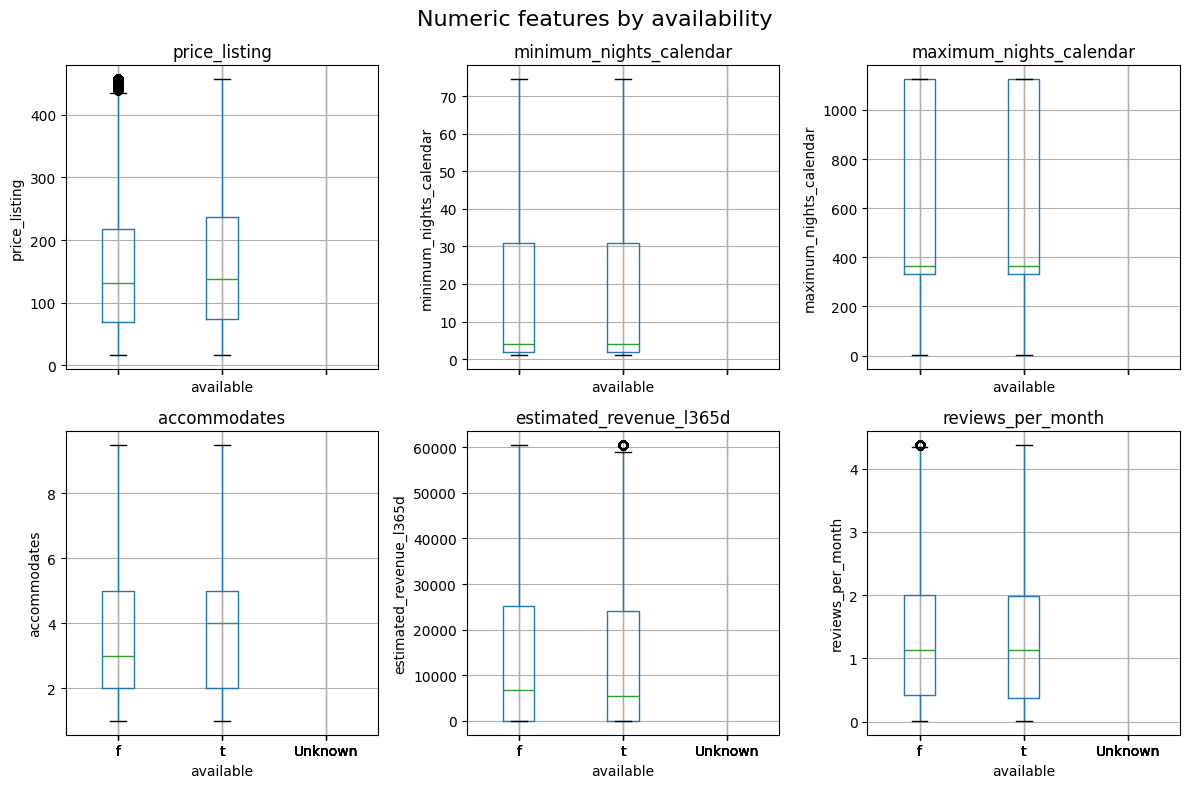

In [19]:
import matplotlib.pyplot as plt
import math

# Choose a limited set of numeric columns to keep plots readable
cols_to_plot = num_cols[:6]      # change 6 to another number if you prefer
n = len(cols_to_plot)

# Grid layout
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(4 * n_cols, 4 * n_rows),
                         sharex=True)

# If there is only 1 row, axes may not be 2D
axes = axes.flatten()

for ax, col in zip(axes, cols_to_plot):
    df_eda.boxplot(column=col, by="available", ax=ax)
    ax.set_title(col)
    ax.set_xlabel("available")
    ax.set_ylabel(col)

# Remove any empty subplots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Numeric features by availability", fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/761316568.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/761316568.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/761316568.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/761316568.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/761316568.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number

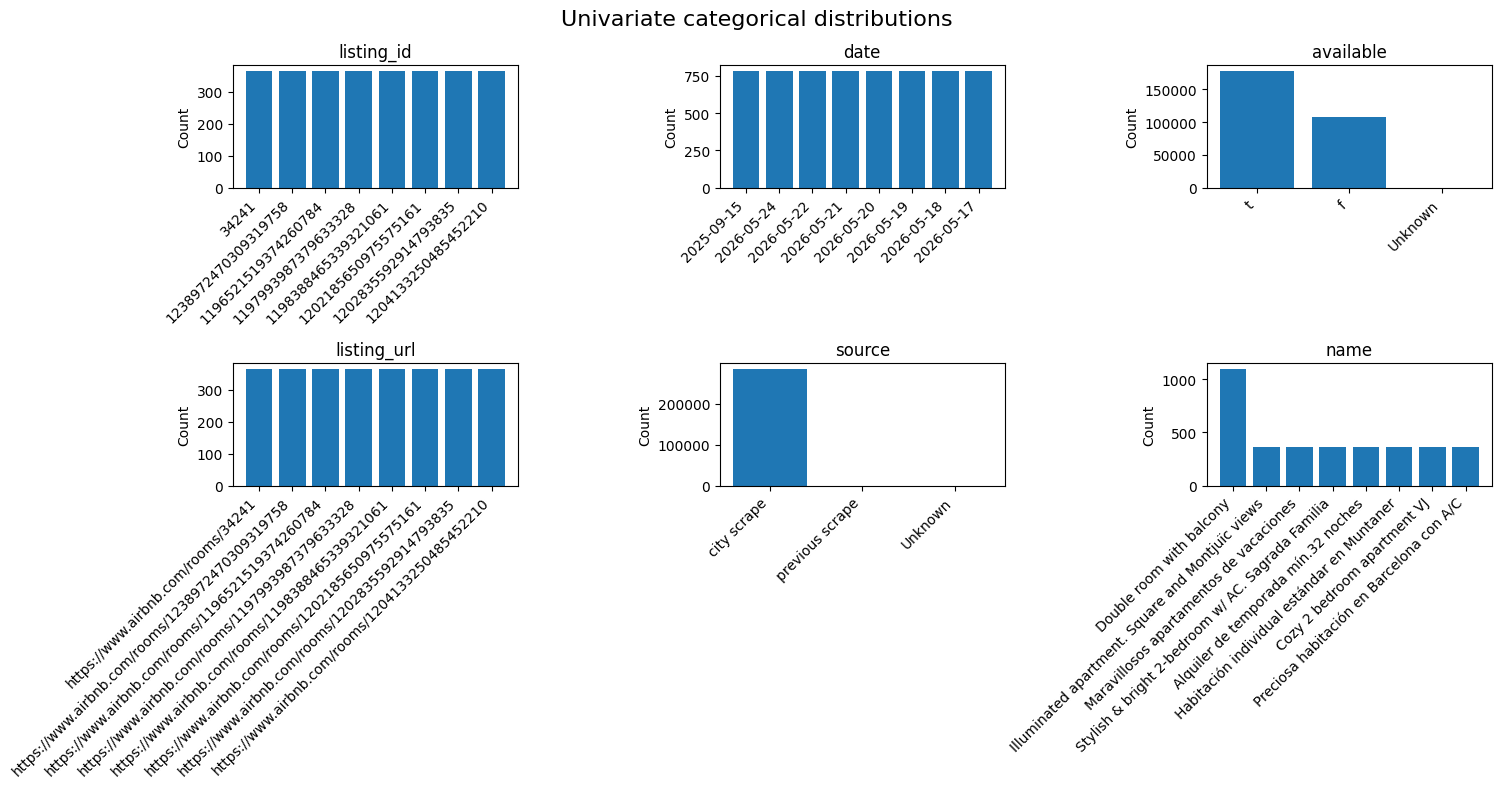

In [20]:
import matplotlib.pyplot as plt
import math

# 3. Univariate CATEGORICAL analysis for potential predictors
# (limit to a few key categorical columns to keep plots readable)

cat_cols_to_plot = cat_cols[:6]   # adjust the slice as you like
max_levels = 8                    # plot only the top k categories

n = len(cat_cols_to_plot)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols_to_plot):
    vc = df_eda[col].value_counts().head(max_levels)
    ax.bar(vc.index.astype(str), vc.values)
    ax.set_title(col)
    ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")
    ax.set_ylabel("Count")

# remove empty axes
for j in range(len(cat_cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Univariate categorical distributions", fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/3142366790.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/3142366790.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/3142366790.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/3142366790.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bd/l4r371657nv1sj8gfv232pxr

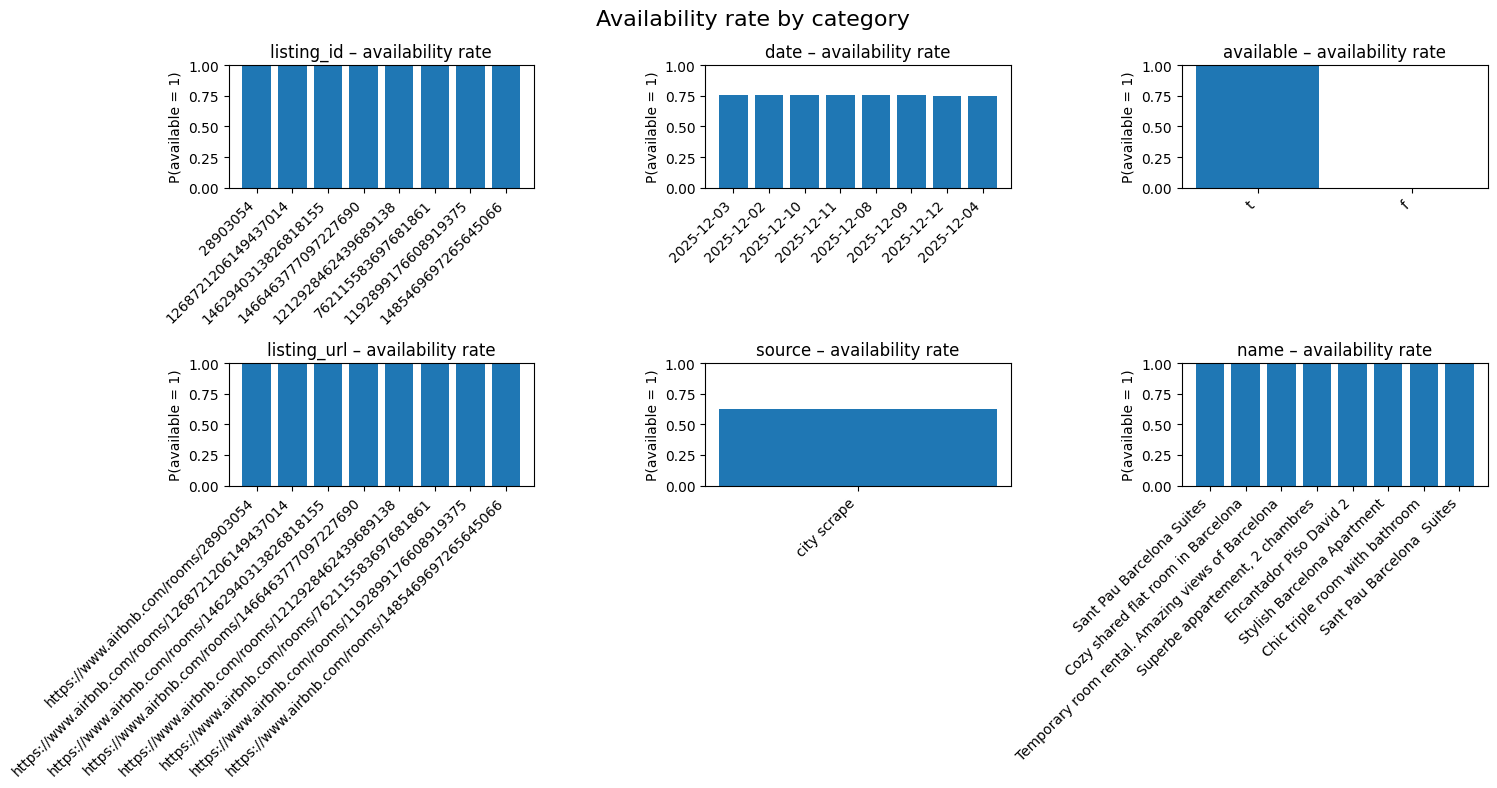

In [21]:
import matplotlib.pyplot as plt
import math

# 4. CATEGORICAL vs TARGET: availability rate by category

cat_cols_to_plot = cat_cols[:6]   # same set as above
max_levels = 8

n = len(cat_cols_to_plot)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols_to_plot):
    # mean availability per category (probability that listing is available)
    rate = (
        df_eda.groupby(col)["available_flag"]
        .mean()
        .dropna()
        .sort_values(ascending=False)
        .head(max_levels)
    )
    ax.bar(rate.index.astype(str), rate.values)
    ax.set_ylim(0, 1)
    ax.set_title(f"{col} – availability rate")
    ax.set_xticklabels(rate.index.astype(str), rotation=45, ha="right")
    ax.set_ylabel("P(available = 1)")

for j in range(len(cat_cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Availability rate by category", fontsize=16)
plt.tight_layout()
plt.show()


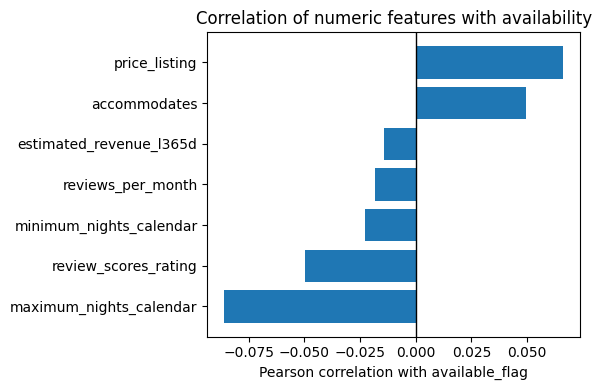

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/3488886012.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/3488886012.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



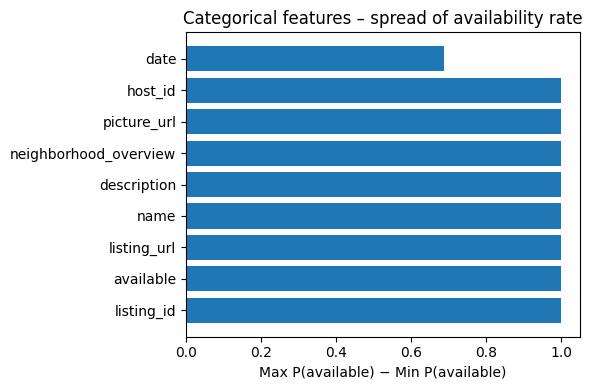

In [22]:
import matplotlib.pyplot as plt

# 5. Global importance preview: correlation / association with target

# 5.1 Numeric features – correlation with available_flag
corr_series = (
    df_eda[num_cols + ["available_flag"]]
    .corr()["available_flag"]
    .drop("available_flag")
    .sort_values()
)

plt.figure(figsize=(6, max(4, 0.3 * len(corr_series))))
plt.barh(corr_series.index, corr_series.values)
plt.axvline(0, color="black", linewidth=1)
plt.title("Correlation of numeric features with availability")
plt.xlabel("Pearson correlation with available_flag")
plt.tight_layout()
plt.show()


# 5.2 Categorical features – how much availability varies between categories
spreads = []
for col in cat_cols[:10]:   # limit to first 10 categorical columns
    rates = df_eda.groupby(col)["available_flag"].mean()
    if rates.notna().sum() > 1:
        spread = rates.max() - rates.min()
        spreads.append((col, spread))

if spreads:
    spread_df = (
        pd.DataFrame(spreads, columns=["feature", "rate_spread"])
        .sort_values("rate_spread", ascending=False)
    )

    plt.figure(figsize=(6, max(4, 0.3 * len(spread_df))))
    plt.barh(spread_df["feature"], spread_df["rate_spread"])
    plt.title("Categorical features – spread of availability rate")
    plt.xlabel("Max P(available) − Min P(available)")
    plt.tight_layout()
    plt.show()


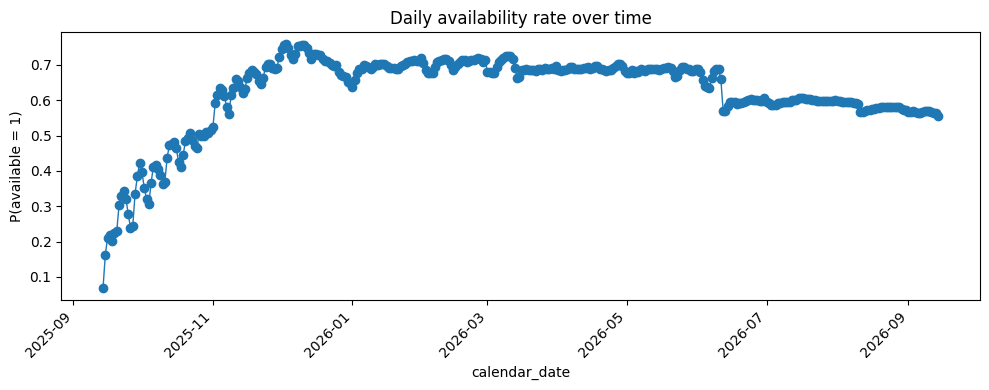

In [23]:
import matplotlib.pyplot as plt

# 6. Time dimension: availability rate over calendar_date

# ensure calendar_date is datetime
df_eda["calendar_date"] = pd.to_datetime(df_eda["calendar_date"], errors="coerce")

daily = (
    df_eda
    .dropna(subset=["calendar_date"])
    .groupby("calendar_date")["available_flag"]
    .mean()
    .reset_index()
    .sort_values("calendar_date")
)

plt.figure(figsize=(10, 4))
plt.plot(daily["calendar_date"], daily["available_flag"], marker="o", linewidth=1)
plt.title("Daily availability rate over time")
plt.xlabel("calendar_date")
plt.ylabel("P(available = 1)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [25]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------------
# Create engineered features for availability prediction
# Assumes you start from the cleaned merged dataframe: df_cleaned
# ------------------------------------------------------------------

df_fe = final_df_clean.copy()

# 0. Target: binary availability flag
df_fe["available_flag"] = df_fe["available"].map({"t": 1, "f": 0})

# ------------------------------------------------------------
# 1. Pricing and revenue features
# ------------------------------------------------------------

# Ensure numeric price (in case any currency symbols remain)
df_fe["price_listing_num"] = (
    df_fe["price_listing"]
    .astype(str)
    .str.replace(r"[^\d\.]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# 1) log_price_listing
df_fe["log_price_listing"] = np.log1p(df_fe["price_listing_num"])

# 2) estimated_occupancy_l365d: already numeric, keep as is

# 3) log_estimated_revenue_l365d (robust to zeros)
df_fe["log_estimated_revenue_l365d"] = np.log1p(
    df_fe["estimated_revenue_l365d"].clip(lower=0)
)

# 4) price_vs_neigh_mean  = price – neighbourhood mean price
neigh_mean_price = (
    df_fe.groupby("neighbourhood_cleansed")["price_listing_num"]
    .transform("mean")
)
df_fe["price_mean_by_neighbourhood"] = neigh_mean_price
df_fe["price_vs_neigh_mean"] = df_fe["price_listing_num"] - neigh_mean_price

# ------------------------------------------------------------
# 2. Stay-length and calendar constraints
# ------------------------------------------------------------

# 5) minimum_nights_calendar          (already numeric)
# 6) maximum_nights_calendar          (already numeric)

# 7) night_range_calendar = max – min
df_fe["night_range_calendar"] = (
    df_fe["maximum_nights_calendar"] - df_fe["minimum_nights_calendar"]
)

# 8) availability_30                  (already numeric)

# 9) accommodates                     (already numeric)

# ------------------------------------------------------------
# 3. Reviews and guest feedback
# ------------------------------------------------------------

# 10) reviews_per_month               (already numeric)
# 11) review_scores_rating            (already numeric)

# 12) review_count                    (already numeric, from reviews table)
# 13) mean_comment_length             (already numeric)

# 14) last_review_recency_days = days since last review
df_fe["last_review_recency_days"] = (
    df_fe["calendar_date"] - df_fe["last_review_date"]
).dt.days

# ------------------------------------------------------------
# 4. Host behaviour and professionalism
# ------------------------------------------------------------

# 15) host_is_superhost_flag (1 if superhost, 0 otherwise)
df_fe["host_is_superhost_flag"] = df_fe["host_is_superhost"].map({"t": 1, "f": 0})

# Helper to parse percentage strings like '95%' into [0,1] floats
def parse_percent(series: pd.Series) -> pd.Series:
    return (
        pd.to_numeric(series.astype(str).str.rstrip("%"), errors="coerce") / 100.0
    )

# 16) host_response_rate_clean
df_fe["host_response_rate_clean"] = parse_percent(df_fe["host_response_rate"])

# 17) host_acceptance_rate_clean
df_fe["host_acceptance_rate_clean"] = parse_percent(df_fe["host_acceptance_rate"])

# 18) host_tenure_days = days on platform at that calendar_date
host_since_dt = pd.to_datetime(df_fe["host_since"], errors="coerce")
df_fe["host_tenure_days"] = (
    df_fe["calendar_date"] - host_since_dt
).dt.days

# 19) num_listings_by_host
# Use the existing calculated count to avoid redundant recomputation
df_fe["num_listings_by_host"] = df_fe["calculated_host_listings_count"]

# ------------------------------------------------------------
# 5. Time dimension
# ------------------------------------------------------------

# 20) month_of_year from calendar_date
df_fe["month_of_year"] = df_fe["calendar_date"].dt.month

# Optional: simple high-season flag for Barcelona (May–September)
high_season_months = [5, 6, 7, 8, 9]
df_fe["is_high_season"] = df_fe["month_of_year"].isin(high_season_months).astype(int)

# ------------------------------------------------------------------
# Non-redundant feature list for modelling (TARGET EXCLUDED)
# ------------------------------------------------------------------

model_features = [
    # Pricing and revenue
    "log_price_listing",
    "estimated_occupancy_l365d",
    "log_estimated_revenue_l365d",
    "price_vs_neigh_mean",
    # Stay-length and constraints
    "minimum_nights_calendar",
    "maximum_nights_calendar",
    "night_range_calendar",
    "availability_30",
    "accommodates",
    # Reviews and feedback
    "reviews_per_month",
    "review_scores_rating",
    "review_count",
    "mean_comment_length",
    "last_review_recency_days",
    # Host behaviour
    "host_is_superhost_flag",
    "host_response_rate_clean",
    "host_acceptance_rate_clean",
    "host_tenure_days",
    "num_listings_by_host",
    # Time
    "month_of_year",
]

target_col = "available_flag"

print("Number of model features:", len(model_features))
print("First 5 rows of engineered features:")
display(df_fe[model_features + [target_col]].head())


/var/folders/bd/l4r371657nv1sj8gfv232pxr0000gn/T/ipykernel_84318/3219607917.py:39: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Number of model features: 20
First 5 rows of engineered features:


,log_price_listing,estimated_occupancy_l365d,log_estimated_revenue_l365d,price_vs_neigh_mean,minimum_nights_calendar,maximum_nights_calendar,night_range_calendar,availability_30,accommodates,reviews_per_month,review_scores_rating,review_count,mean_comment_length,last_review_recency_days,host_is_superhost_flag,host_response_rate_clean,host_acceptance_rate_clean,host_tenure_days,num_listings_by_host,month_of_year,available_flag
0,4.70953,255,10.24178,-35.237288,31.0,180,149.0,30,2.0,0.14,4.36,25.0,408.44,314.0,0.0,1.0,0.92,5713.0,3,9,1.0
1,4.70953,255,10.24178,-35.237288,31.0,180,149.0,30,2.0,0.14,4.36,25.0,408.44,315.0,0.0,1.0,0.92,5714.0,3,9,1.0
2,4.70953,255,10.24178,-35.237288,31.0,180,149.0,30,2.0,0.14,4.36,25.0,408.44,316.0,0.0,1.0,0.92,5715.0,3,9,1.0
3,4.70953,255,10.24178,-35.237288,31.0,180,149.0,30,2.0,0.14,4.36,25.0,408.44,317.0,0.0,1.0,0.92,5716.0,3,9,1.0
4,4.70953,255,10.24178,-35.237288,31.0,180,149.0,30,2.0,0.14,4.36,25.0,408.44,318.0,0.0,1.0,0.92,5717.0,3,9,1.0
